## Crea un módulo que contenga las siguientes funciones:

In [23]:
!pip install yfinance
!pip install plotly
!pip install mplfinance

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import plotly.graph_objects as go
import plotly.express as px
import mplfinance as mpf

plt.style.use('ggplot')

Leemos los datos tanto de fichero como de Yahoo Finance

In [3]:
# sp500 = yf.download('^GSPC', start='2003-07-30', end='2019-05-15')
# dax = yf.download('^GDAXI', start='2003-07-30', end='2019-05-15')
# ftse = yf.download('^FTSE', start='2003-07-30', end='2019-05-15')
# ibex_yf = yf.download('^IBEX', start='2003-07-30', end='2019-05-15')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [25]:
indices_dic = {'sp500': '^GSPC',
               'dax': '^GDAXI',
               'ftse': '^FTSE',
               'ibex': '^IBEX'}

In [26]:
precios_OHLC = yf.download(list(indices_dic.values()), start='2003-07-30', end='2019-05-15')


[*********************100%%**********************]  4 of 4 completed


In [27]:
precios_OHLC.head(2)

Adj Close                                              Close  \
                  ^FTSE       ^GDAXI       ^GSPC        ^IBEX        ^FTSE   
Date                                                                         
2003-07-30  4141.200195  3429.030029  987.489990  6984.292969  4141.200195   
2003-07-31  4157.000000  3487.860107  990.309998  7061.692871  4157.000000   

                                                         High               \
                 ^GDAXI       ^GSPC        ^IBEX        ^FTSE       ^GDAXI   
Date                                                                         
2003-07-30  3429.030029  987.489990  6984.299805  4159.299805  3449.209961   
2003-07-31  3487.860107  990.309998  7061.700195  4171.000000  3487.860107   

            ...         Low                      Open                          \
            ...       ^GSPC        ^IBEX        ^FTSE      ^GDAXI       ^GSPC   
Date        ...                                                                 
2003-07-30  ...  985.960022  6917.399902  4137.000000  3418.48999  989.280029   
2003-07-31  ...  987.489990  6941.000000  4141.200195  3432.75000  987.489990   

                               Volume                                       
                  ^IBEX         ^FTSE       ^GDAXI         ^GSPC     ^IBEX  
Date                                                                        
2003-07-30  6925.100098  1.312865e+09   84533400.0  1.391900e+09  115600.0  
2003-07-31  7013.299805  1.761536e+09  127620300.0  1.608000e+09  174000.0  

[2 rows x 24 columns]

In [32]:
sp500_OHLC = pd.DataFrame({
    'Open': precios_OHLC['Open'][indices_dic['sp500']],
    'High': precios_OHLC['High'][indices_dic['sp500']],
    'Low': precios_OHLC['Low'][indices_dic['sp500']],
    'Close': precios_OHLC['Close'][indices_dic['sp500']],
    'Adj Close': precios_OHLC['Adj Close'][indices_dic['sp500']],
    'Volume': precios_OHLC['Volume'][indices_dic['sp500']]
})

In [33]:
precios_df = pd.DataFrame({
    'SP500': precios_OHLC['Adj Close'][indices_dic['sp500']],
    'DAX': precios_OHLC['Adj Close'][indices_dic['dax']],
    'FTSE': precios_OHLC['Adj Close'][indices_dic['ftse']],
    'IBEX': precios_OHLC['Adj Close'][indices_dic['ibex']]
})

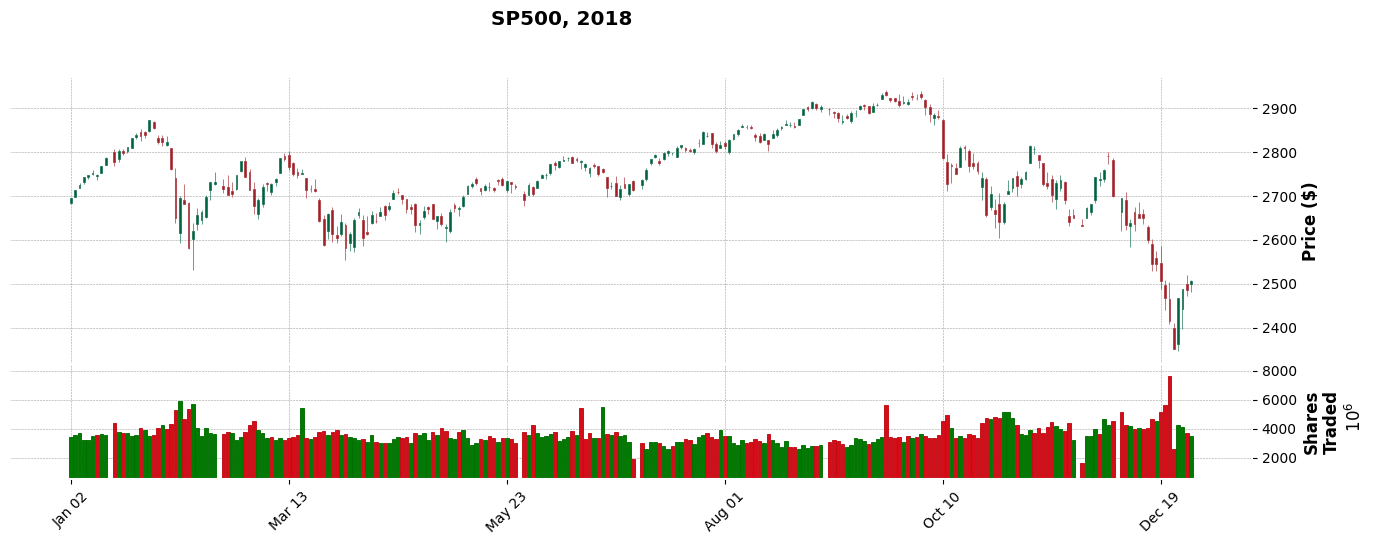

In [30]:
mpf.plot(
            sp500_OHLC.loc['2018'],
            type='candle',
            style='charles',
            title='SP500, 2018',
            ylabel='Price ($)',
            volume=True,
            ylabel_lower='Shares\nTraded',
            figratio=(30, 10),
            )

Crea una gráfica de velas con los datos del mes de julio del índice DAX

In [34]:
precios_df.head(3)

,SP500,DAX,FTSE,IBEX
Date,,,,
2003-07-30,987.489990,3429.030029,4141.200195,6984.292969
2003-07-31,990.309998,3487.860107,4157.000000,7061.692871
2003-08-01,980.150024,3438.889893,4098.399902,6995.392578


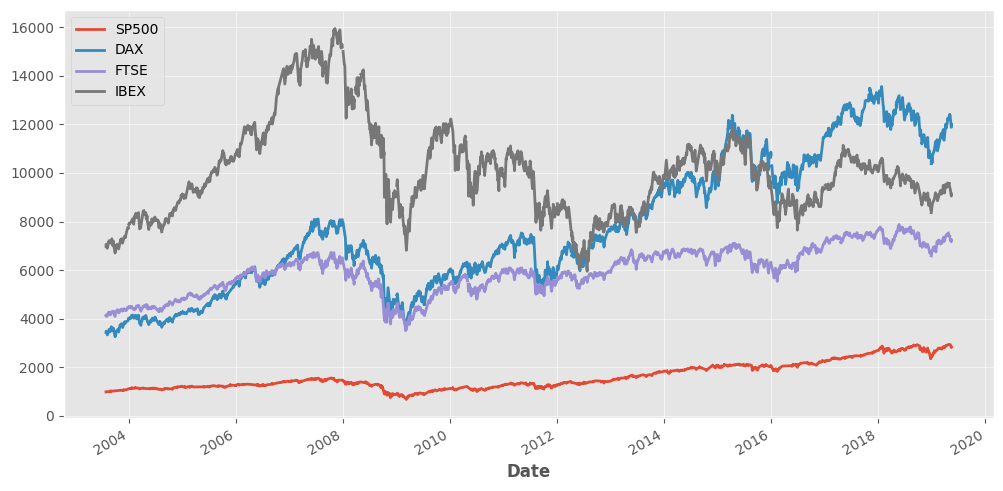

In [37]:
precios_df.plot(figsize=(12,6));

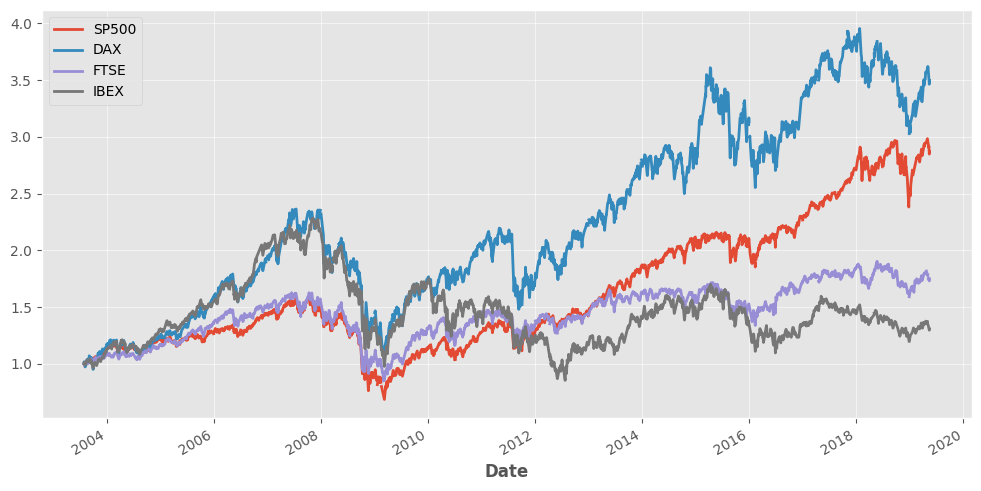

In [38]:
precios_unif_df = precios_df / precios_df.iloc[0]
precios_unif_df.plot(figsize=(12,6));

In [41]:
# cargamos los datos

# para ejecutar en local
# ibex = pd.read_csv('data/ibex.csv', index_col=0, parse_dates=True).close
# ibex_div = pd.read_csv('data/ibex_div.csv', index_col=0, parse_dates=True).close

# para ejecutar en colab
ibex = pd.read_csv('https://raw.githubusercontent.com/alfonso-santos/Intro-Python-Finanzas-2023/main/4_pandas/data/ibex.csv', index_col=0, parse_dates=True).close
ibex_div = pd.read_csv('https://raw.githubusercontent.com/alfonso-santos/Intro-Python-Finanzas-2023/main/4_pandas/data/ibex_div.csv', index_col=0, parse_dates=True).close
data_ibex = pd.concat([ibex, ibex_div], axis=1).dropna()
data_ibex.columns = ['ibex', 'ibex_div']

In [67]:
kk = pd.concat([precios_unif_df, ibex_unif['ibex_div']], axis=1).dropna()

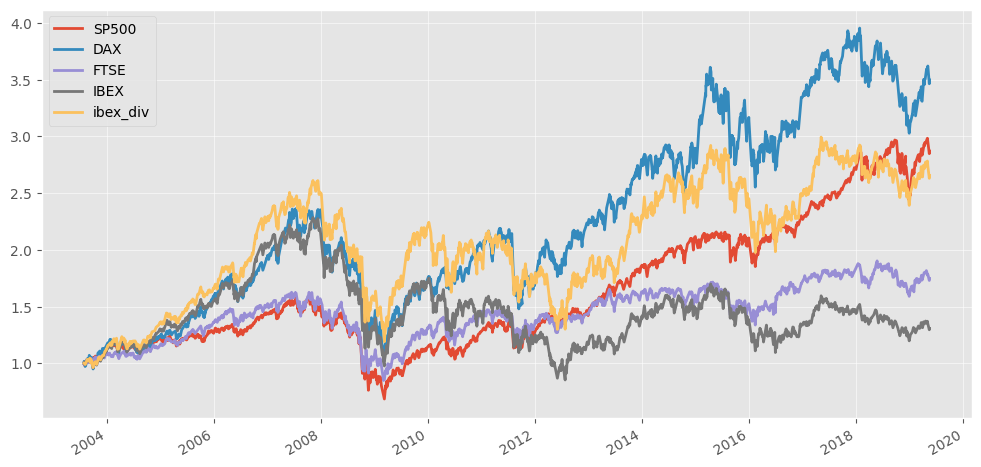

In [69]:
kk.plot(figsize=(12,6));

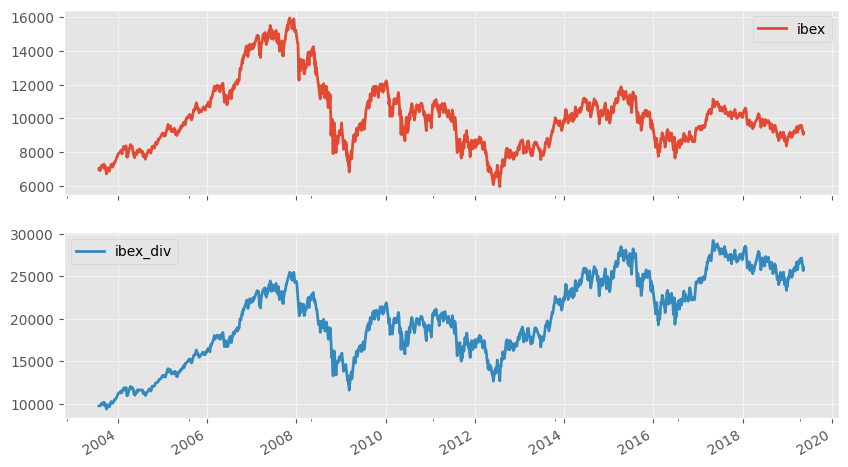

In [43]:
data_ibex.plot(subplots=True, figsize=(10, 6));

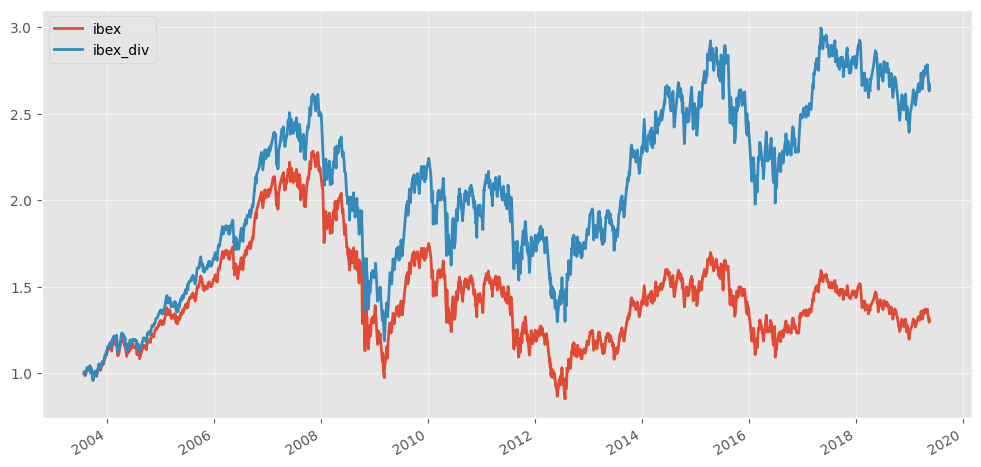

In [59]:
ibex_unif = data_ibex/data_ibex.iloc[0]

ibex_unif.plot(figsize=(12, 6));

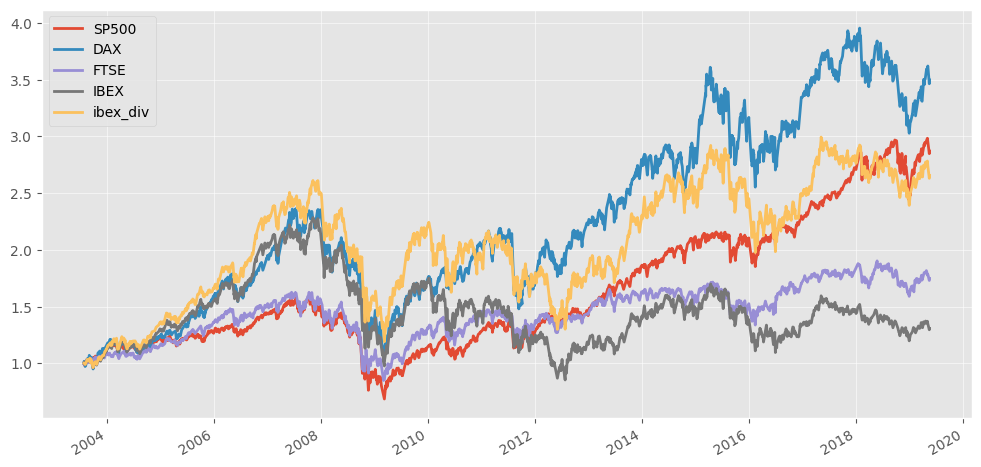

In [70]:
ind_fin_df = pd.concat([precios_unif_df, ibex_unif['ibex_div']], axis=1).dropna()

ind_fin_df.plot(figsize=(12, 6));

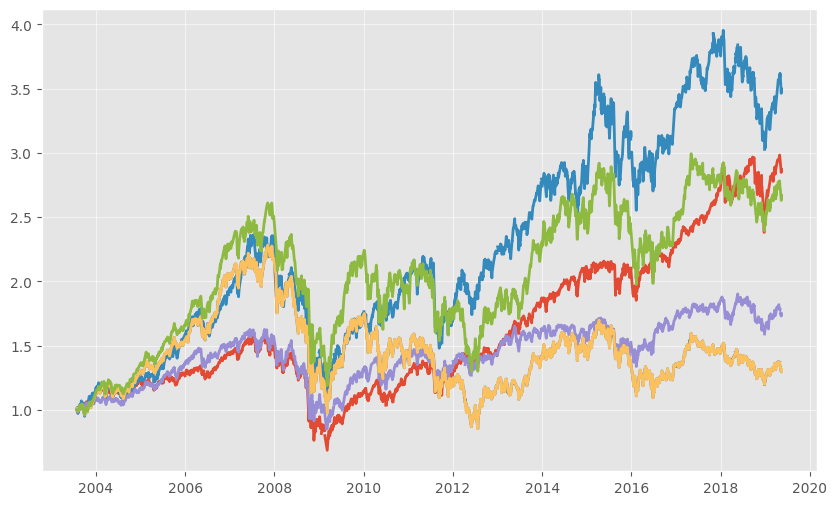

In [63]:
plt.figure(figsize=(10, 6))
plt.plot(precios_unif_df);
plt.plot(ibex_unif);

Calcula el retorno diario de un dataframe con los precios diarios

In [1]:
def retorno_diario(data):
    '''
    data: DataFrame con los precios de las acciones en las columnas
    y las fechas en los índices
    '''
    retornos = np.log(data).diff().dropna()
    return retornos


Calcula el retorno anualizado 

In [5]:
def retorno_anualizado(data):
    '''
    data: DataFrame con los precios de las acciones en las columnas
    y las fechas en los índices
    '''
    data_anual = data.resample('y').last()
    retornos = np.log(data_anual).diff().dropna()
    return retornos

Calcule la correlación rolada, con el periodo como parámetro

In [6]:
def correlacion(data, ventana=10):
    '''
    data: DataFrame con los precios de las acciones en las columnas
    y las fechas en los índices
    ventana: número de días para calcular la correlación
    '''
    corr = data.rolling(ventana).corr()
    return corr

Calcula la beta

In [7]:
def beta(data,index_col=0):
    '''
    data: DataFrame con los precios de las acciones en las columnas
    y las fechas en los índices
    '''
    retornos = retorno_diario(data)
    covariance_matrix = retornos.cov()
    variance = retornos.iloc[:,index_col].var()
    beta = covariance_matrix.iloc[:,index_col]/variance
    return beta

## Prueba tus funciones en los siguientes ejercicios, si crees que falta alguna función sientete libre de crearla.

Calcula la serie de retornos anuales  del Ibex con dividendos y del Ibex.

In [3]:
# cargamos los datos

# para ejecutar en local
# ibex = pd.read_csv('data/ibex.csv', index_col=0, parse_dates=True).close
# ibex_div = pd.read_csv('data/ibex_div.csv', index_col=0, parse_dates=True).close

# para ejecutar en colab
ibex = pd.read_csv('https://raw.githubusercontent.com/alfonso-santos/Intro-Python-Finanzas-2023/main/4_pandas/data/ibex.csv', index_col=0, parse_dates=True).close
ibex_div = pd.read_csv('https://raw.githubusercontent.com/alfonso-santos/Intro-Python-Finanzas-2023/main/4_pandas/data/ibex_div.csv', index_col=0, parse_dates=True).close
data = pd.concat([ibex, ibex_div], axis=1).dropna()
data.columns = ['ibex', 'ibex_div']

In [23]:
retornos_anuales = retorno_anualizado(data)

Realiza un gráfico de barras comparándolos.

<AxesSubplot:>

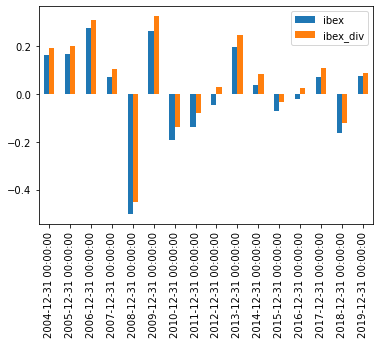

In [24]:
retornos_anuales.plot.bar()

Compara los retornos anuales del Ibex con los de SAN.

<Axes: >

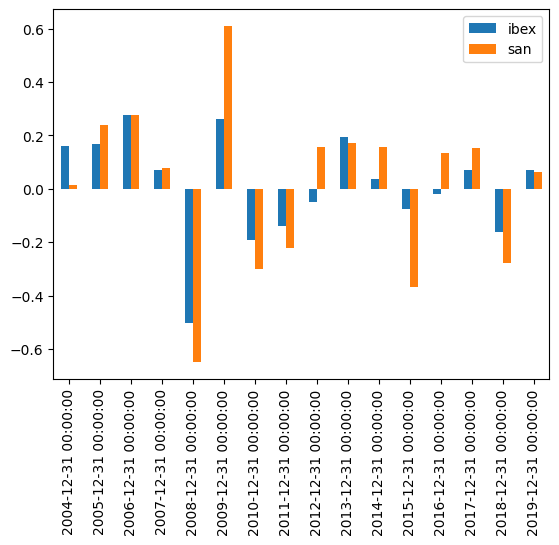

In [8]:
# para ejecutar en local
#san = pd.read_csv('data/SAN.csv', index_col=0, parse_dates=True).close

#para ejecutar en colab
san = pd.read_csv('https://raw.githubusercontent.com/alfonso-santos/Intro-Python-Finanzas-2023/main/4_pandas/data/SAN.csv', index_col=0, parse_dates=True).close

data = pd.concat([ibex, san], axis=1).dropna()
data.columns = ['ibex', 'san']
retornos_anuales = retorno_anualizado(data)
retornos_anuales.plot.bar()

Calcula la correlación del SAN, REE y NTGY con el IBEX con dividendos.

In [10]:
# para ejecutar en local
# ree = pd.read_csv('data/REE.csv', index_col=0, parse_dates=True).close
# ntgy = pd.read_csv('data/NTGY.csv', index_col=0, parse_dates=True).close

# para ejecutar en colab
ree = pd.read_csv('https://raw.githubusercontent.com/alfonso-santos/Intro-Python-Finanzas-2023/main/4_pandas/data/REE.csv', index_col=0, parse_dates=True).close
ntgy = pd.read_csv('https://raw.githubusercontent.com/alfonso-santos/Intro-Python-Finanzas-2023/main/4_pandas/data/NTGY.csv', index_col=0, parse_dates=True).close
data = pd.concat([ibex_div, san, ree, ntgy], axis=1).dropna()
data.columns = ['ibex_div', 'san', 'ree', 'ntgy']

In [63]:
corr_data = data.corr()

Ahora calcula la correlación rolada de 100 días para los activos del ejercico anterior.

In [64]:
corr_roll = correlacion(data, 100).dropna()

In [65]:
corr_roll

ibex_div       san       ree      ntgy
2005-11-22 ibex_div  1.000000  0.932820  0.709917 -0.403556
           san       0.932820  1.000000  0.550656 -0.557764
           ree       0.709917  0.550656  1.000000  0.080162
           ntgy     -0.403556 -0.557764  0.080162  1.000000
2005-11-23 ibex_div  1.000000  0.931653  0.736726 -0.405852
...                       ...       ...       ...       ...
2019-05-14 ntgy      0.832484  0.630218 -0.560497  1.000000
2019-05-15 ibex_div  1.000000  0.870032 -0.636553  0.819045
           san       0.870032  1.000000 -0.632097  0.602338
           ree      -0.636553 -0.632097  1.000000 -0.539171
           ntgy      0.819045  0.602338 -0.539171  1.000000

[13752 rows x 4 columns]

Calcula la beta de los 3 activos NTGY, REE y SAN, Recuerda:

$\beta = \frac{cov(R_m, R_s)}{var(R_m)}$

Donde $R_m$ y $R_s$ son la serie de retornos del índice y de la acción.

In [71]:
beta_data = beta(data, index_col=0)

In [72]:
beta_data

ibex_div    1.000000
san         1.292866
ree         0.552745
ntgy        0.756547
Name: ibex_div, dtype: float64

Ahora calcula la beta rolada de 100 días para los activos del ejercico anterior

Calcula la media movil de 30 y 200 dias de REE y realiza una figura junto con la serie de precios originales

Usando el precio de cierre del Ibex, calcula las velas mensuales y anuales.

Píntalas utilizando un gráfico.
